In [2]:
!pip install opendatasets

In [3]:
#export KAGGLE_API_TOKEN=KGAT_e45fbebfb3c987f614ea51458f1901d5
#KGAT_e45fbebfb3c987f614ea51458f1901d5
#kaggle competitions list

#this is the code and API credentials I got from kaggle but it was not working on my system as there was no kaggle directory 
#and the system wasn't leting me create one as well
#I am now just downloading the dataset and uploading it to github into a folder and the pulling the dataset from the folder

In [4]:
'''import requests
import pandas as pd
url= "https://www.kaggle.com/datasets/andrewmvd/doom-crossing"
response=request.get(url).content
df=pd.read_csv(io.)'''
#scrapped code

'import requests\nimport pandas as pd\nurl= "https://www.kaggle.com/datasets/andrewmvd/doom-crossing"\nresponse=request.get(url).content\ndf=pd.read_csv(io.)'

In [5]:
'''import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/doom-crossing")

print("Path to dataset files:", "C:\Users\batch1\Downloads")'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 141-142: truncated \UXXXXXXXX escape (Temp/ipykernel_29160/2953402499.py, line 1)

In [38]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

image_folder = r"C:\Users\Adithyash BC\Desktop\photosrand\Saved Pictures"

valid_exts = (".jpg", ".jpeg", ".png")
files = [f for f in os.listdir(image_folder) if f.lower().endswith(valid_exts)]
print("Total images found:", len(files))
files[:10]

Total images found: 50


['20240419_142817.jpg',
 '20240419_150133.jpg',
 '20240419_172437.jpg',
 '7b263a99-6067-47fa-b3c1-20e0520ce11b.jpg',
 '96-967220_lenovo-thinkpad-wallpaper-4k.jpg',
 'apashe heart.png',
 'apex.png',
 'apophis.jpg',
 'brr.jpg',
 'burns -2.jpg']

In [39]:
image_info = []

for file in files:
    path = os.path.join(image_folder, file)
    try:
        img = Image.open(path)
        img_array = np.array(img)
        h, w = img_array.shape[:2]
        c = 1 if img_array.ndim == 2 else img_array.shape[2]
        file_size = os.path.getsize(path) / 1024

        image_info.append({
            "file": file,
            "height": h,
            "width": w,
            "channels": c,
            "file_size_kb": round(file_size, 2)
        })
    except Exception as e:
        print( "unreadable file: {file} -> {e}")


In [40]:
df = pd.DataFrame(image_info)
df.head()

,file,height,width,channels,file_size_kb
0,20240419_142817.jpg,1970,1170,3,207.57
1,20240419_150133.jpg,851,600,3,337.12
2,20240419_172437.jpg,1024,672,3,137.27
3,7b263a99-6067-47fa-b3c1-20e0520ce11b.jpg,1524,1079,3,400.78
4,96-967220_lenovo-thinkpad-wallpaper-4k.jpg,768,1366,3,292.71


In [41]:
print(df.describe())
print("Unique shapes (H x W x C):")
df["shape"] = df.apply(lambda row: (row["height"], row["width"], row["channels"]), axis=1)
print(df["shape"].value_counts())

            height        width   channels  file_size_kb
count    50.000000    50.000000  50.000000     50.000000
mean   1056.820000  1510.560000   3.380000   1021.100800
std     586.493443   686.279177   0.490314   1735.432307
min     190.000000   266.000000   3.000000      7.790000
25%     646.500000  1080.000000   3.000000    120.620000
50%     937.500000  1283.000000   3.000000    451.855000
75%    1117.500000  1920.000000   4.000000    952.007500
max    3000.000000  3840.000000   4.000000   8777.880000
Unique shapes (H x W x C):
(1080, 1920, 3)    6
(1080, 1920, 4)    3
(648, 1152, 3)     2
(2400, 1080, 3)    2
(1970, 1170, 3)    1
(616, 1080, 3)     1
(810, 1918, 4)     1
(776, 563, 3)      1
(299, 728, 3)      1
(1280, 1920, 4)    1
(471, 1015, 4)     1
(793, 1920, 4)     1
(675, 1200, 3)     1
(1280, 1798, 3)    1
(432, 1137, 4)     1
(646, 646, 4)      1
(2023, 3136, 3)    1
(769, 1366, 3)     1
(816, 1920, 4)     1
(822, 1920, 4)     1
(787, 1920, 4)     1
(637, 1138, 4)     

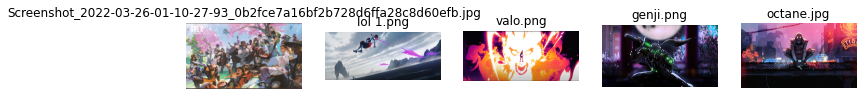

In [42]:
import random
sample_files = random.sample(files, min(5, len(files)))
plt.figure(figsize=(12, 8))
for i, file in enumerate(sample_files, 1):
    img = Image.open(os.path.join(image_folder, file))
    plt.subplot(1, len(sample_files), i)
    plt.imshow(img)
    plt.title(file)
    plt.axis("off")

plt.show()

In [43]:
largest = df.loc[df["file_size_kb"].idxmax()]
smallest = df.loc[df["file_size_kb"].idxmin()]
print("\nLargest Image:\n", largest)
print("\nSmallest Image:\n", smallest)


Largest Image:
 file                   apex.png
height                     1593
width                      2500
channels                      4
file_size_kb            8777.88
shape           (1593, 2500, 4)
Name: 6, dtype: object

Smallest Image:
 file                  five.png
height                     648
width                     1152
channels                     3
file_size_kb              7.79
shape           (648, 1152, 3)
Name: 14, dtype: object
